In [812]:
import os
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from talib import  BBANDS, ROC, EMA
from hmmlearn.hmm import GaussianHMM
#from datetime import datetime

data_dir = 'data'

# List all JSON files in the directory
json_files = [f for f in os.listdir(data_dir) if f.endswith('.json')]

# Initialize an empty list to store DataFrames
df_list = []

# Read each JSON file and append the DataFrame to the list
for json_file in json_files:
    file_path = os.path.join(data_dir, json_file)
    df = pd.read_json(file_path)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
df_org = pd.concat(df_list, ignore_index=True)


def compute_average_ask_bid(price_data):
    if( price_data['Ask'] is not None and price_data['Bid'] is not None):
        return (price_data['Ask'] + price_data['Bid']) / 2
    else:
        return None

df_org['openPrices'] = [compute_average_ask_bid(OpenPrice) for OpenPrice in df_org["OpenPrice"]];
df_org['highPrices'] = [compute_average_ask_bid(HighPrice) for HighPrice in df_org["HighPrice"]];
df_org['lowPrices'] = [compute_average_ask_bid(LowPrice) for LowPrice in df_org["LowPrice"]];
df_org['closedprices'] = [compute_average_ask_bid(closedprice) for closedprice in df_org["ClosePrice"]];

## Drop rows with None values
df_org.dropna(subset=['closedprices', 'highPrices', 'lowPrices', 'openPrices'], inplace=True)


# Compute olhc4
df_org['olhc4'] = (df_org['closedprices'] + df_org['highPrices'] + df_org['lowPrices'] + df_org['openPrices']) / 4
# Compute log returns
df_org['log_returns'] = np.log(df_org['olhc4'] / df_org['olhc4'].shift(1))
df_org['momentum'] = np.log(df_org['olhc4']/df_org['olhc4'].shift(20))

df_org['SnapshotTime'] = pd.to_datetime(df_org['SnapshotTime'], format='ISO8601')

# Extract unique days
df_org['Date'] = df_org['SnapshotTime'].dt.date
unique_days = df_org['Date'].unique()

df_org.head()

,ClosePrice,HighPrice,LastTradedVolume,LowPrice,OpenPrice,SnapshotTime,SnapshotTimeUTC,openPrices,highPrices,lowPrices,closedprices,olhc4,log_returns,momentum,Date
0,"{'Ask': 7290.0, 'Bid': 7288.0, 'LastTraded': N...","{'Ask': 7297.0, 'Bid': 7294.0, 'LastTraded': N...",74,"{'Ask': 7288.7, 'Bid': 7286.7, 'LastTraded': N...","{'Ask': 7296.2, 'Bid': 7293.2, 'LastTraded': N...",2024-11-18 08:00:00,2024-11-18T07:00:00,7294.7,7295.5,7287.7,7289.0,7291.725,NaN,NaN,2024-11-18
1,"{'Ask': 7282.7, 'Bid': 7280.7, 'LastTraded': N...","{'Ask': 7289.0, 'Bid': 7287.0, 'LastTraded': N...",53,"{'Ask': 7282.7, 'Bid': 7280.7, 'LastTraded': N...","{'Ask': 7289.0, 'Bid': 7287.0, 'LastTraded': N...",2024-11-18 08:01:00,2024-11-18T07:01:00,7288.0,7288.0,7281.7,7281.7,7284.850,-0.000943,NaN,2024-11-18
2,"{'Ask': 7278.0, 'Bid': 7276.0, 'LastTraded': N...","{'Ask': 7283.2, 'Bid': 7281.2, 'LastTraded': N...",18,"{'Ask': 7277.7, 'Bid': 7275.7, 'LastTraded': N...","{'Ask': 7283.2, 'Bid': 7281.2, 'LastTraded': N...",2024-11-18 08:02:00,2024-11-18T07:02:00,7282.2,7282.2,7276.7,7277.0,7279.525,-0.000731,NaN,2024-11-18
3,"{'Ask': 7283.2, 'Bid': 7281.2, 'LastTraded': N...","{'Ask': 7283.2, 'Bid': 7281.2, 'LastTraded': N...",25,"{'Ask': 7278.2, 'Bid': 7276.2, 'LastTraded': N...","{'Ask': 7278.2, 'Bid': 7276.2, 'LastTraded': N...",2024-11-18 08:03:00,2024-11-18T07:03:00,7277.2,7282.2,7277.2,7282.2,7279.700,0.000024,NaN,2024-11-18
4,"{'Ask': 7279.7, 'Bid': 7277.7, 'LastTraded': N...","{'Ask': 7283.0, 'Bid': 7281.0, 'LastTraded': N...",22,"{'Ask': 7279.2, 'Bid': 7277.2, 'LastTraded': N...","{'Ask': 7283.0, 'Bid': 7281.0, 'LastTraded': N...",2024-11-18 08:04:00,2024-11-18T07:04:00,7282.0,7282.0,7278.2,7278.7,7280.225,0.000072,NaN,2024-11-18


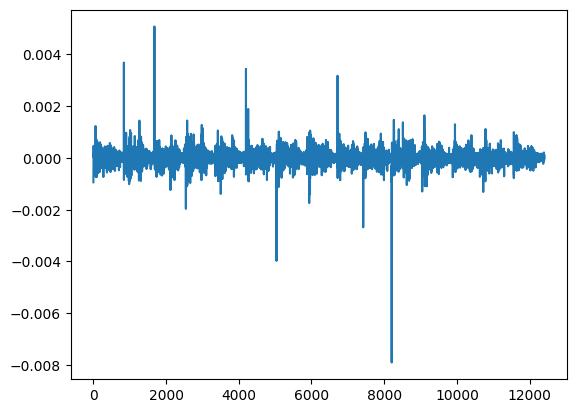

In [813]:


plt.plot(df_org['log_returns'] )
plt.show()

In [814]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12391 entries, 0 to 12405
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ClosePrice        12391 non-null  object        
 1   HighPrice         12391 non-null  object        
 2   LastTradedVolume  12391 non-null  int64         
 3   LowPrice          12391 non-null  object        
 4   OpenPrice         12391 non-null  object        
 5   SnapshotTime      12391 non-null  datetime64[ns]
 6   SnapshotTimeUTC   12391 non-null  object        
 7   openPrices        12391 non-null  float64       
 8   highPrices        12391 non-null  float64       
 9   lowPrices         12391 non-null  float64       
 10  closedprices      12391 non-null  float64       
 11  olhc4             12391 non-null  float64       
 12  log_returns       12390 non-null  float64       
 13  momentum          12371 non-null  float64       
 14  Date              12391 non

In [ ]:

up, mid, low = BBANDS(df_org.olhc4, timeperiod=21, nbdevup=1.5, nbdevdn=1.5, matype=0)
roc10= ROC(df_org.olhc4, timeperiod=10 )
roc13= ROC(df_org.olhc4, timeperiod=13 )
roc15= ROC(df_org.olhc4, timeperiod=15 )
roc20= ROC(df_org.olhc4, timeperiod=20 )
kstmt = 1.618 * EMA(roc10, 10) +  1.5*EMA(roc13,13) +  1.382 * EMA(roc15,15) + 1.236*EMA(roc20,20)


roc300= ROC(df_org.olhc4, timeperiod=50 )
roc400= ROC(df_org.olhc4, timeperiod=100 )
roc600= ROC(df_org.olhc4, timeperiod=150 )
roc800= ROC(df_org.olhc4, timeperiod=200 )
kstlt = 1.618 * EMA(roc300, 30) +  1.5*EMA(roc400,40) +  1.382 * EMA(roc600,60) + 1.236*EMA(roc800,80)



kstmtup, kstmtmid, kstmtlow = BBANDS(kstmt, timeperiod=40, nbdevup=1.2, nbdevdn=1.2, matype=0)

df_org['roc10'] = roc10
df_org['kstmt'] = kstmt
df_org['kstmtup'] = kstmtup
df_org['kstmtmid'] = kstmtmid
df_org['kstmtlow'] = kstmtlow
df_org['kstlt'] = kstlt
df_org['up'] = up
df_org['low'] = low

In [816]:
#data = pd.DataFrame({'olhc4': df_org['olhc4'], 'upper': up, 'middle': mid, 'lower': low})

In [817]:

#data.plot(figsize=(20, 10), title='Bollinger Bands')


In [818]:

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

# Add traces for the initial plot (first day)
initial_day = unique_days[5]
print(initial_day)

df_day = df_org[df_org['Date'] == initial_day]

fig.append_trace(   go.Scatter(x = df_day['SnapshotTime'],
                         y = df_day['kstmt'],
                         name = 'kstmt',
                         opacity = 0.5), row=1, col=1)

fig.append_trace(   go.Scatter(x = df_day['SnapshotTime'],
                         y = df_day['kstmtup'],
                        line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'kst upper band',
                         opacity = 0.5), row=1, col=1)

fig.append_trace(   go.Scatter(x = df_day['SnapshotTime'],
                         y = df_day['kstmtlow'],
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.3), row=1, col=1)


fig.append_trace(   go.Scatter(x = df_day['SnapshotTime'],
                         y = df_day['kstlt'],
                         name = 'kstlt',
                         opacity = 0.5), row=2, col=1)

fig.append_trace(  go.Candlestick(
                x=df_day['SnapshotTime'],
                open=df_day['openPrices'],
                high=df_day['highPrices'],
                low=df_day['lowPrices'],
                close=df_day['closedprices']), row=3, col=1)

fig.append_trace(   go.Scatter(x = df_day['SnapshotTime'],
                         y = df_day['up'],
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5), row=3, col=1)

fig.append_trace(  go.Scatter(x = df_day['SnapshotTime'],
                         y = df_day['low'],
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.3), row=3, col=1)

dropdown_buttons = [
    {
        'label': str(day),
        'method': 'update',
       'args': [
            {
                'x': [df_org[df_org['Date'] == day]['SnapshotTime']] * 11,
                'y': [
                    df_org[df_org['Date'] == day]['openPrices'],
                    df_org[df_org['Date'] == day]['highPrices'],
                    df_org[df_org['Date'] == day]['lowPrices'],
                    df_org[df_org['Date'] == day]['closedprices'],
                    df_org[df_org['Date'] == day]['olhc4'],
                    df_org[df_org['Date'] == day]['log_returns'],
                    df_org[df_org['Date'] == day]['kstmt'], 
                    df_org[df_org['Date'] == day]['kstmtup'], 
                    df_org[df_org['Date'] == day]['kstmtlow'],
                    df_org[df_org['Date'] == day]['up'],
                    df_org[df_org['Date'] == day]['low']
                ]
            },
            {
                'xaxis': {
                    'range': [
                        df_org[df_org['Date'] == day]['SnapshotTime'].min(),
                        df_org[df_org['Date'] == day]['SnapshotTime'].max()
                    ]
                },
                'yaxis2': {
                    'range': [
                        df_org[df_org['Date'] == day][['openPrices', 'highPrices', 'lowPrices', 'closedprices']].min().min(),
                        df_org[df_org['Date'] == day][['openPrices', 'highPrices', 'lowPrices', 'closedprices']].max().max()
                    ]
                },
                'yaxis': {
#                    'range': [
#                        df_org[df_org['Date'] == day]['kstmt'].min(),
#                        df_org[df_org['Date'] == day]['kstmt'].max()
#                    ]
                    'range': [
                        df_org[df_org['Date'] == day][['openPrices', 'highPrices', 'lowPrices', 'closedprices']].min().min(),
                        df_org[df_org['Date'] == day][['openPrices', 'highPrices', 'lowPrices', 'closedprices']].max().max()
                    ]
                }
            }
        ]
    }
    for day in unique_days
]



# Update layout to include dropdown menu and range slider for the second row
fig.update_layout(
    width=1790,
    height=1500,
    template='plotly_dark',
    xaxis2=dict(
        rangeslider=dict(
            visible=False
        )
    ),
     xaxis3=dict(
        rangeslider=dict(
            visible=True
        )
    )
    #,
    #updatemenus=[
    #   {
    #        'buttons': dropdown_buttons,
    #        'direction': 'down',
    #        'showactive': True,
    #    }
    #]
)

fig.update_yaxes(title_text="Price", row=2, col=1)
fig.update_yaxes(title_text="ROC", row=1, col=1)

fig.show()

2024-11-25


In [819]:
np.random.seed(0)
data = df_org[["SnapshotTime", "Date", "log_returns", "kstlt", "kstmt", "olhc4", "roc10"]].dropna()

features = ['log_returns','kstlt', 'kstmt' ]  # '',  , 

print(data.shape[0])
hmm_model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000, tol=1, algorithm='map')
hmm_model.fit(np.array(data[features]))
print("Model Score: ", hmm_model.score(np.array(data[features])))

data.head()


12112
Model Score:  42598.46791010699


,SnapshotTime,Date,log_returns,kstlt,kstmt,olhc4,roc10
279,2024-11-18 12:39:00,2024-11-18,-0.000224,-0.611709,-0.769229,7242.475,-0.236925
280,2024-11-18 12:40:00,2024-11-18,0.000173,-0.671985,-0.849698,7243.725,-0.217989
281,2024-11-18 12:41:00,2024-11-18,0.000010,-0.729305,-0.916650,7243.800,-0.225546
282,2024-11-18 12:42:00,2024-11-18,-0.000059,-0.786438,-0.978899,7243.375,-0.267459
283,2024-11-18 12:43:00,2024-11-18,-0.000124,-0.845750,-1.031610,7242.475,-0.278134


In [820]:

data['state']=hmm_model.predict(np.array(data[features]))
data.head()


,SnapshotTime,Date,log_returns,kstlt,kstmt,olhc4,roc10,state
279,2024-11-18 12:39:00,2024-11-18,-0.000224,-0.611709,-0.769229,7242.475,-0.236925,1
280,2024-11-18 12:40:00,2024-11-18,0.000173,-0.671985,-0.849698,7243.725,-0.217989,1
281,2024-11-18 12:41:00,2024-11-18,0.000010,-0.729305,-0.916650,7243.800,-0.225546,1
282,2024-11-18 12:42:00,2024-11-18,-0.000059,-0.786438,-0.978899,7243.375,-0.267459,1
283,2024-11-18 12:43:00,2024-11-18,-0.000124,-0.845750,-1.031610,7242.475,-0.278134,1


In [821]:
graph = data[data['Date'] == initial_day] #.iloc[0:1200]


#plt.figure(figsize=(24, 16))
#sns.scatterplot(x=graph.index, y='olhc4', hue='state', data=graph, s=50, palette='deep')
#plt.title('Market Regimes')

graph.head()

,SnapshotTime,Date,log_returns,kstlt,kstmt,olhc4,roc10,state
4198,2024-11-25 08:00:00,2024-11-25,0.003440,-0.422759,0.766702,7284.5125,0.524564,1
4199,2024-11-25 08:01:00,2024-11-25,-0.000644,-0.323028,0.981277,7279.8250,0.471662,1
4200,2024-11-25 08:02:00,2024-11-25,-0.000041,-0.230021,1.154721,7279.5250,0.458510,1
4201,2024-11-25 08:03:00,2024-11-25,-0.000141,-0.147061,1.286163,7278.5000,0.439167,1
4202,2024-11-25 08:04:00,2024-11-25,-0.000423,-0.077233,1.359352,7275.4250,0.388768,1


In [822]:

mark = dict(color=[ 'yellow' if x == 0 else 'red' if x == 1 else 'green'  for x in graph['state']])



fig = go.Figure(data=[go.Scatter(x=graph['SnapshotTime'], y=graph['olhc4'],  mode='lines+markers', marker = mark)])

layout = go.Layout(template='plotly_dark',
                   title ='market regime' , height=500,
                    xaxis_rangeslider_visible=True)
fig.update_layout(layout)
fig.show()

analyse distribution des etats cahche

8.071590099702154e-07
8.775907151745367e-06


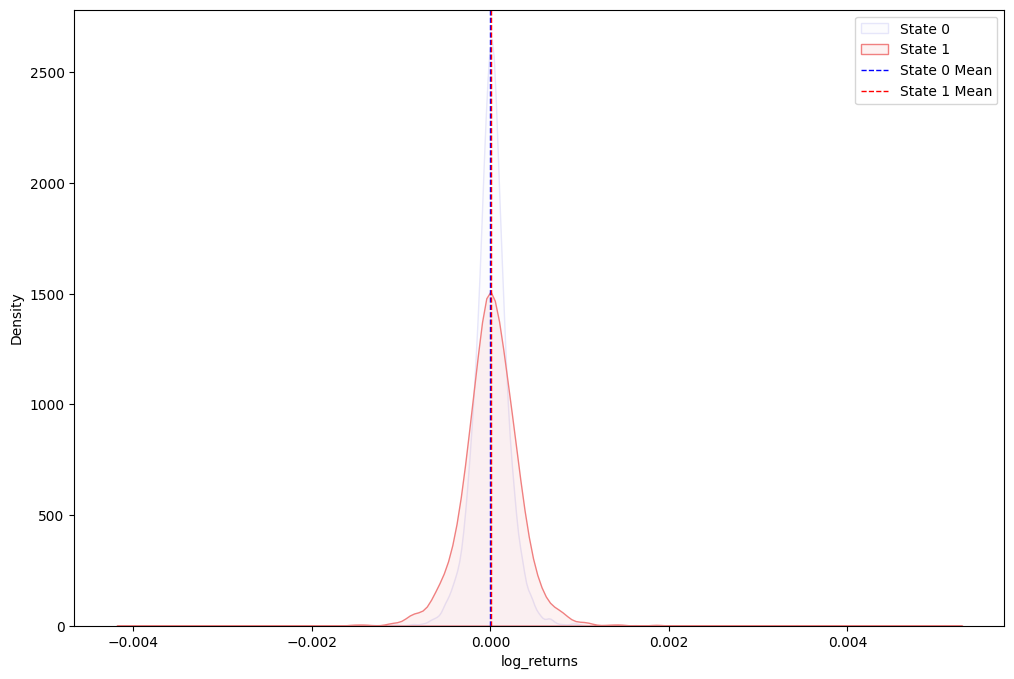

In [823]:
state0 = data[data['state'] == 0 ]
state1 = data[data['state'] == 1 ]

plt.figure(figsize=(12, 8))
sns.kdeplot(state0['log_returns'], color='lavender', label='State 0', fill=True, alpha=0.1)
sns.kdeplot(state1['log_returns'], color='lightcoral', label='State 1', fill=True, alpha=0.1)
plt.axvline( state0['log_returns'].mean(), color='blue', linestyle='dashed', linewidth=1, label='State 0 Mean')
plt.axvline( state1['log_returns'].mean(), color='red', linestyle='dashed', linewidth=1,  label='State 1 Mean')
plt.legend()
#state0.head()
#state1.head()

print(state0['log_returns'].mean())
print(state1['log_returns'].mean())